In [79]:
#Importing libraries

import pandas as pd  # For Data analysis and manipulatiton
import numpy as np   # For numerical calculations and statistics
import warnings      # For removing warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt   # For plotting graphs and data visualization
import seaborn as sns   # For plotting graphs and data visualization
from sklearn.model_selection import train_test_split   #for training and testing data
from sklearn.preprocessing import MinMaxScaler      #For scaling variables
from sklearn.linear_model import LinearRegression    #For applying linear regression model
from sklearn.feature_selection import RFE            # For Recursive Feature Elimination
from statsmodels.stats.outliers_influence import variance_inflation_factor    #To check VIF score of variables
from sklearn.metrics import r2_score, mean_squared_error     #for R square score

import statsmodels.api as sm


In [2]:
bike = pd.read_csv("day.csv")  # Reading dataset

## Understanding Data

In [3]:
bike.head()   # Printing first 5 rows of the dataset

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bike.shape  # dataset has 730 rows and 16 columns

(730, 16)

In [5]:
# check the information of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Looking at dataset, we found that all columns except "dteday" are in integer or float type but some columns should be categorical in nature.

In [6]:
#Checking descriptive information

bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Checking Missing and Null Values

In [7]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 We can check that there is no null values in columns

# Checking Duplicate Entries in the dataset

In [8]:
bike_1 = bike.copy()
bike_1.drop_duplicates(inplace = True)

In [9]:
bike_1.shape

(730, 16)

In [10]:
bike.shape

(730, 16)

We can check that there is no duplicate entries in the dataset as bike_1 and bike have same shape

In [11]:
# drop columns instance, dteday, casual, registered 
bike.drop(['instant', 'dteday','casual','registered'], axis=1, inplace=True)

In [12]:
bike.shape # After dropping columns,checking the shape of the dataset

(730, 12)

In [13]:
# identify categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

# identify numeric variables
num_vars = ['temp', 'atemp' , 'hum','windspeed','cnt']

In [14]:
# convert dtype of categorical variables
bike[cat_vars] = bike[cat_vars].astype('category')

In [15]:
bike.describe()   # checking insights for numric variables

temp       atemp         hum   windspeed          cnt
count  730.000000  730.000000  730.000000  730.000000   730.000000
mean    20.319259   23.726322   62.765175   12.763620  4508.006849
std      7.506729    8.150308   14.237589    5.195841  1936.011647
min      2.424346    3.953480    0.000000    1.500244    22.000000
25%     13.811885   16.889713   52.000000    9.041650  3169.750000
50%     20.465826   24.368225   62.625000   12.125325  4548.500000
75%     26.880615   30.445775   72.989575   15.625589  5966.000000
max     35.328347   42.044800   97.250000   34.000021  8714.000000

In [16]:
# get the insights of categorical variables
bike.describe(include=['category'])

season   yr  mnth  holiday  weekday  workingday  weathersit
count      730  730   730      730      730         730         730
unique       4    2    12        2        7           2           3
top          3    0     1        0        0           1           1
freq       188  365    62      709      105         499         463

## Data Dictionary:
Below categorical columns are having following catecteristics and can be maped with respective values:

* season column is having four seasons as (1:spring, 2:summer, 3:fall, 4:winter)
* mnth column is having 12 categorical values denoting for months Jan to Dec
* weathersit is having for categorical values (1: Clear_FewClouds, 2: Mist_Cloudy, 3: LightSnow_LightRain, 4: HeavyRain_IcePallets)
* weekday column having 7 varibles ( 0 to 6 ) denoting (0: Sun, 1: Mon 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat)
* yr, holiday, workingday are having binary values. So we will not map these columns

In [17]:
# maped the season column according to descripttions
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# maped the weekday column according to descriptin
bike['weekday'] = bike['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})


# maped mnth column values (1 to 12 ) as (jan to dec) respectively
bike['mnth'] = bike['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

#  maped weathersit column
bike['weathersit'] = bike['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

# Data Visualization

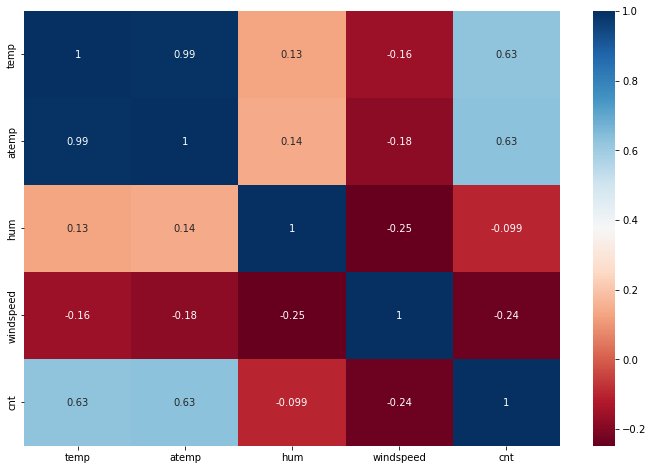

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(bike.corr(), annot = True, cmap="RdBu")
plt.show()

Heatmap shows that there is very high collinearity between temp and atemp which is 0.99 so dropping 'atemp' variable

In [19]:
bike.drop(['atemp'], axis=1, inplace=True)

In [20]:
bike.shape

(730, 11)

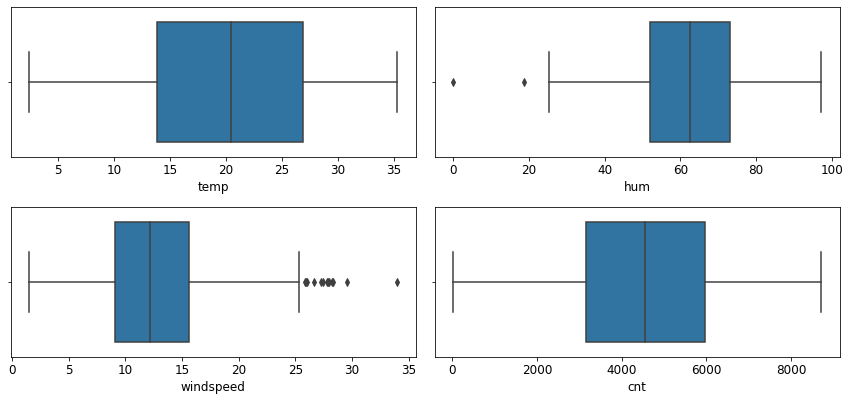

In [21]:
# Visualising numerical varibles

# selecting numerical variables
var = bike.select_dtypes(exclude = 'category').columns

# Box plot
col = 2
row = len(var)//col+1

plt.figure(figsize=(12,8))
plt.rc('font', size=12)
for i in list(enumerate(var)):
    plt.subplot(row, col, i[0]+1)
    sns.boxplot(bike[i[1]])    
plt.tight_layout()   
plt.show()

Insights : We can see that there are outliers in hum and windspeed

In [22]:
# get percentage outlier for hum and windspeed

# function to get outlier percentage
def percentage_outlier(x):
    iqr = bike[x].quantile(0.75)-bike[x].quantile(0.25)
    HL = bike[x].quantile(0.75)+iqr*1.5
    LL = bike[x].quantile(0.25)-iqr*1.5
    per_outlier = ((bike[x]<LL).sum()+(bike[x]>HL).sum())/len(bike[x])*100
    per_outlier = round(per_outlier,2)
    return(per_outlier)

print('Percentage of outlier (hum): ', percentage_outlier('hum'))
print('Percentage of outlier (windspeed): ', percentage_outlier('windspeed'))

Percentage of outlier (hum):  0.27
Percentage of outlier (windspeed):  1.78


Insights:

Percentage of outlier for hum and windspeed are 0.27 and 1.78 respectively. As these percentage is low, and we can see there is no significant abnormal outlier value. So we will leave it as it is.

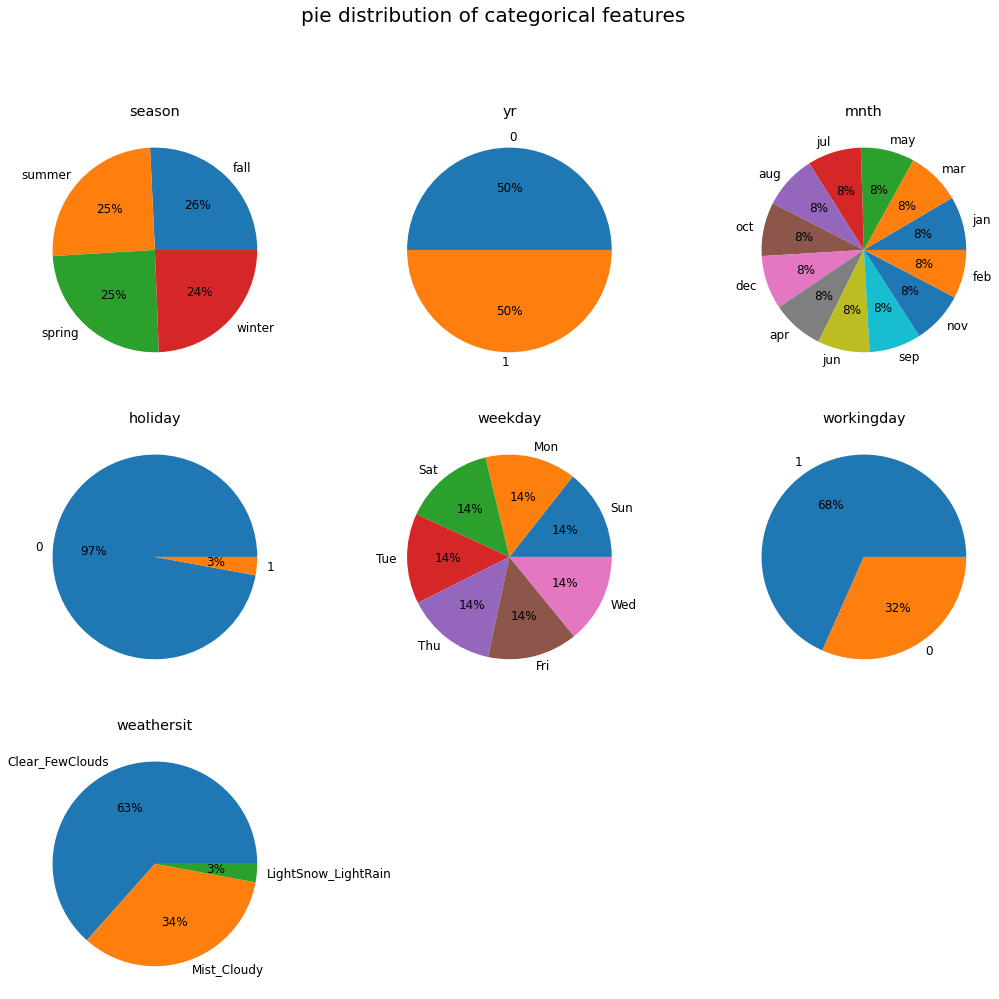

In [24]:
# # # Visulalising Categorical Variables using pie chart

bike_piplot=bike.select_dtypes(include='category')
plt.figure(figsize=(18,16))
plt.suptitle('pie distribution of categorical features', fontsize=20)
for i in range(1,bike_piplot.shape[1]+1):
    plt.subplot(3,3,i)
    gca=plt.gca()
    gca.set_title(bike_piplot.columns.values[i-1])
    val=bike_piplot.iloc[:,i-1].value_counts(normalize=True).values
    index=bike_piplot.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(val,labels=index,autopct='%1.0f%%')
# plt.tight_layout(pad = 0.5)
plt.show()

# Insights:

* Seasons: We could see business was operating similar days in all four seasons.
* Yr: Number of days operation in both the year are almost same.
* Month: We could see business was operating similar days in all 12 months.
* Holiday: Business was operating in 3% days of holiday
* weekdays: We could see business was operating similar percentage in all weekdays.
* Workingday: Bisuness was operating in 68% in workign days and 32% in nonworking days.
* Weathersit: From the above analaysis it is being observed that there is no data for 4th category of weathersit i.e Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.May be the company is not operating on those days or there was no demand of bike.

## Bi-variate Analysis

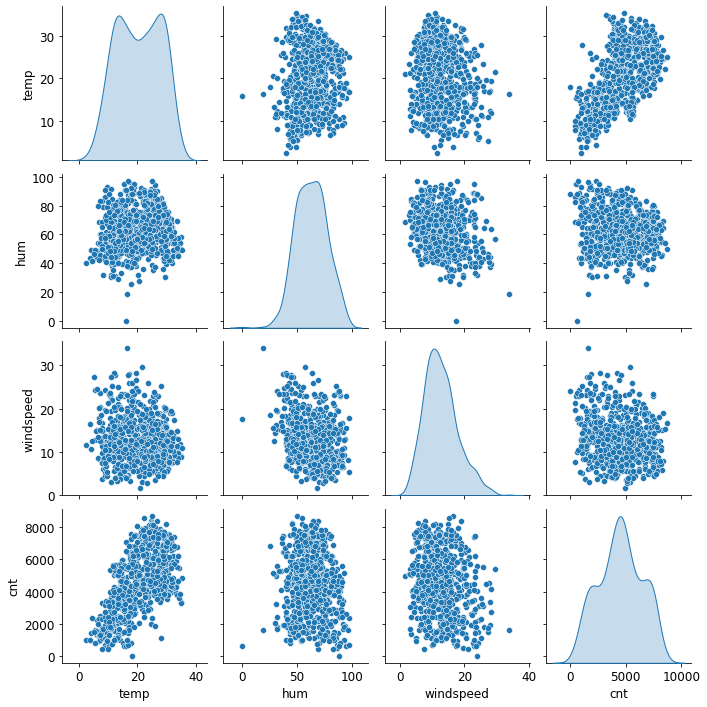

In [25]:
# pairplot for continuous data type
sns.pairplot(bike.select_dtypes(['int64','float64']), diag_kind='kde')
plt.show()

Insights:
* We can check out that there is linear relationship of temp with cnt.So linear Regression can be used in this case for further analysis.
* From the above pairplot we could observe that, temp has highest positive correlation with target variable cnt.

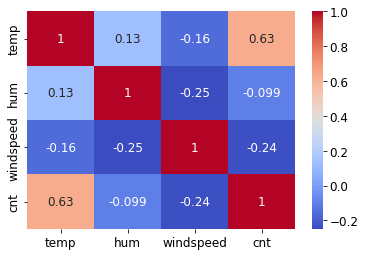

In [26]:
# look at the correaltion between continous varibales using heat map
sns.heatmap(bike.corr(), annot=True, cmap='coolwarm')
plt.show()

We could infer following observation:

* A positive correalation observed between cnt and temp (0.63)
* A Negative correlation observed for cnt with hum and windspeed (-0.099 and -0.24)

In [27]:
bike.describe()

temp         hum   windspeed          cnt
count  730.000000  730.000000  730.000000   730.000000
mean    20.319259   62.765175   12.763620  4508.006849
std      7.506729   14.237589    5.195841  1936.011647
min      2.424346    0.000000    1.500244    22.000000
25%     13.811885   52.000000    9.041650  3169.750000
50%     20.465826   62.625000   12.125325  4548.500000
75%     26.880615   72.989575   15.625589  5966.000000
max     35.328347   97.250000   34.000021  8714.000000

In [28]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

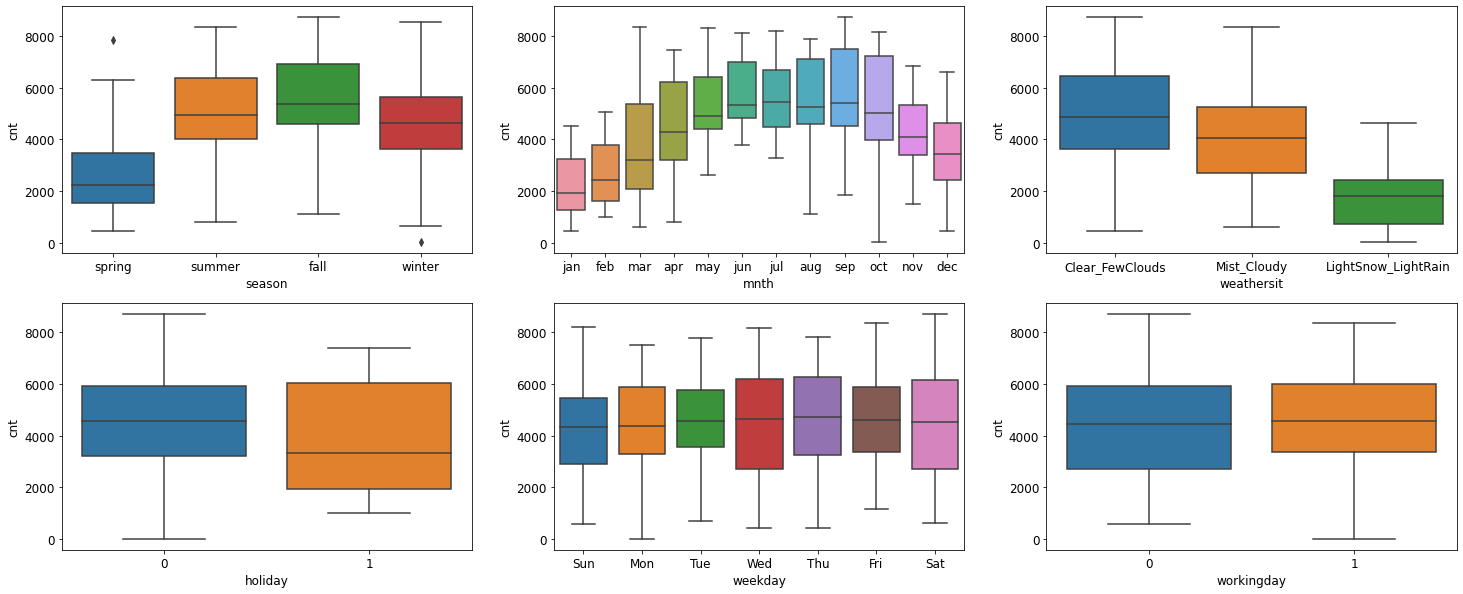

In [29]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

Insights:
Q. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

Answer:

* The demad of bike is less in the month of spring when compared with other seasons
* The demand bike increased in the year 2019 when compared with year 2018.
* Month Jun to Sep is the period when bike demand is high. The Month Jan is the lowest demand month.
* Bike demand is less in holidays in comparison to not being holiday.
* The demand of bike is almost similar throughout the weekdays.
* There is no significant change in bike demand with workign day and non working day.
* The bike demand is high when weather is clear and Few clouds however demand is less in case of Lightsnow and light rainfall. * * We do not have any dat for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog , so we can not derive any conclusion. May be the company is not operating on those days or there is no demand of bike.

## Data Preparation

In [31]:
# get dummy variables for season, weekday, mnth and weathersit
dummy_vars = pd.get_dummies(bike[['season','weekday','mnth','weathersit']],drop_first=True)

# concat the dummy df with original bike
df = pd.concat([bike,dummy_vars], axis = 1)

# drop season column
df.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

df.head()


yr holiday workingday       temp      hum  windspeed   cnt  season_summer  \
0  0       0          0  14.110847  80.5833  10.749882   985              0   
1  0       0          0  14.902598  69.6087  16.652113   801              0   
2  0       0          1   8.050924  43.7273  16.636703  1349              0   
3  0       0          1   8.200000  59.0435  10.739832  1562              0   
4  0       0          1   9.305237  43.6957  12.522300  1600              0   

   season_fall  season_winter  ...  mnth_may  mnth_jun  mnth_jul  mnth_aug  \
0            0              0  ...         0         0         0         0   
1            0              0  ...         0         0         0         0   
2            0              0  ...         0         0         0         0   
3            0              0  ...         0         0         0         0   
4            0              0  ...         0         0         0         0   

   mnth_sep  mnth_oct  mnth_nov  mnth_dec  weathersit_Mist_Cloudy  \
0         0         0         0         0                       1   
1         0         0         0         0                       1   
2         0         0         0         0                       0   
3         0         0         0         0                       0   
4         0         0         0         0                       0   

   weathersit_LightSnow_LightRain  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 29 columns]

In [32]:
bike=df

In [33]:
bike.shape

(730, 29)

In [34]:
bike.head()

yr holiday workingday       temp      hum  windspeed   cnt  season_summer  \
0  0       0          0  14.110847  80.5833  10.749882   985              0   
1  0       0          0  14.902598  69.6087  16.652113   801              0   
2  0       0          1   8.050924  43.7273  16.636703  1349              0   
3  0       0          1   8.200000  59.0435  10.739832  1562              0   
4  0       0          1   9.305237  43.6957  12.522300  1600              0   

   season_fall  season_winter  ...  mnth_may  mnth_jun  mnth_jul  mnth_aug  \
0            0              0  ...         0         0         0         0   
1            0              0  ...         0         0         0         0   
2            0              0  ...         0         0         0         0   
3            0              0  ...         0         0         0         0   
4            0              0  ...         0         0         0         0   

   mnth_sep  mnth_oct  mnth_nov  mnth_dec  weathersit_Mist_Cloudy  \
0         0         0         0         0                       1   
1         0         0         0         0                       1   
2         0         0         0         0                       0   
3         0         0         0         0                       0   
4         0         0         0         0                       0   

   weathersit_LightSnow_LightRain  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 29 columns]

In [35]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   hum                             730 non-null    float64 
 5   windspeed                       730 non-null    float64 
 6   cnt                             730 non-null    int64   
 7   season_summer                   730 non-null    uint8   
 8   season_fall                     730 non-null    uint8   
 9   season_winter                   730 non-null    uint8   
 10  weekday_Mon                     730 non-null    uint8   
 11  weekday_Tue                     730 non-null    uint8   
 12  weekday_Wed           

###  Observations

* yr, holiday and workign day columns are showing datatype 'categorical' but these data are 0 and 1. So we will convert these data type to uint8

In [36]:
# Convert categorical columns to numeric 
df[['yr','holiday','workingday']]= df[['yr','holiday','workingday']].astype('uint8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_summer                   730 non-null    uint8  
 8   season_fall                     730 non-null    uint8  
 9   season_winter                   730 non-null    uint8  
 10  weekday_Mon                     730 non-null    uint8  
 11  weekday_Tue                     730 non-null    uint8  
 12  weekday_Wed                     730 

## Splitting Data into Train and Test set

In [38]:
# Split train test dataset
bike_train, bike_test = train_test_split(df, train_size = 0.7, random_state = 10 )
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


## 3.3 Scaling of data set
During EDA we could observe that there is different range of data in the data set. So it becomes important to scale the data.
Here we will be using Min-Max scaling (normalisation) to scale both training and tesing dataset.

Training Data Scaling

In [39]:
num_vars = ['temp', 'hum','windspeed','cnt']

In [40]:
# Scaling of train set

# instantiate an object
scaler = MinMaxScaler()

# fit and transform on training data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
72    0        0           1  0.298094  0.393891   0.236118  0.194978   
510   1        0           0  0.778657  0.694105   0.364071  0.737052   
700   1        0           0  0.327249  0.809877   0.210252  0.509236   
264   0        0           1  0.694699  0.910249   0.217975  0.526862   
577   1        0           1  0.811368  0.624004   0.244886  0.863093   

     season_summer  season_fall  season_winter  ...  mnth_may  mnth_jun  \
72               0            0              0  ...         0         0   
510              1            0              0  ...         1         0   
700              0            0              1  ...         0         0   
264              0            1              0  ...         0         0   
577              0            1              0  ...         0         0   

     mnth_jul  mnth_aug  mnth_sep  mnth_oct  mnth_nov  mnth_dec  \
72          0         0         0         0         0         0   
510         0         0         0         0         0         0   
700         0         0         0         0         0         1   
264         0         0         1         0         0         0   
577         0         1         0         0         0         0   

     weathersit_Mist_Cloudy  weathersit_LightSnow_LightRain  
72                        0                               0  
510                       0                               0  
700                       1                               0  
264                       1                               0  
577                       0                               0  

[5 rows x 29 columns]

Testing Data Scaling

In [41]:
# check test dataset before scaling
bike_test.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  \
566   1        0           0  24.429153  86.5417  14.291100  4459   
374   1        0           1  12.656536  64.6522  12.565984  3598   
181   0        0           1  29.622500  39.6250   6.874736  5362   
529   1        0           1  26.581653  56.9583  17.000111  7363   
233   0        0           1  28.358347  47.0000  18.542250  4758   

     season_summer  season_fall  season_winter  ...  mnth_may  mnth_jun  \
566              0            1              0  ...         0         0   
374              0            0              0  ...         0         0   
181              0            1              0  ...         0         0   
529              1            0              0  ...         0         1   
233              0            1              0  ...         0         0   

     mnth_jul  mnth_aug  mnth_sep  mnth_oct  mnth_nov  mnth_dec  \
566         1         0         0         0         0         0   
374         0         0         0         0         0         0   
181         1         0         0         0         0         0   
529         0         0         0         0         0         0   
233         0         1         0         0         0         0   

     weathersit_Mist_Cloudy  weathersit_LightSnow_LightRain  
566                       0                               1  
374                       0                               0  
181                       0                               0  
529                       0                               0  
233                       0                               0  

[5 rows x 29 columns]

In [42]:
# transform test dataset 
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
566   1        0           0  0.652175  0.863516   0.393568  0.486297   
374   1        0           1  0.276477  0.584521   0.340487  0.382349   
181   0        0           1  0.817910  0.265533   0.165370  0.595316   
529   1        0           1  0.720868  0.486457   0.476922  0.836895   
233   0        0           1  0.777567  0.359532   0.524373  0.522395   

     season_summer  season_fall  season_winter  ...  mnth_may  mnth_jun  \
566              0            1              0  ...         0         0   
374              0            0              0  ...         0         0   
181              0            1              0  ...         0         0   
529              1            0              0  ...         0         1   
233              0            1              0  ...         0         0   

     mnth_jul  mnth_aug  mnth_sep  mnth_oct  mnth_nov  mnth_dec  \
566         1         0         0         0         0         0   
374         0         0         0         0         0         0   
181         1         0         0         0         0         0   
529         0         0         0         0         0         0   
233         0         1         0         0         0         0   

     weathersit_Mist_Cloudy  weathersit_LightSnow_LightRain  
566                       0                               1  
374                       0                               0  
181                       0                               0  
529                       0                               0  
233                       0                               0  

[5 rows x 29 columns]

## Split data set into X and y sets (for both train and test set)

In [43]:
# Creating X and y data dataframe for train set
y_train = bike_train.pop('cnt')
X_train = bike_train
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  season_summer  \
72    0        0           1  0.298094  0.393891   0.236118              0   
510   1        0           0  0.778657  0.694105   0.364071              1   
700   1        0           0  0.327249  0.809877   0.210252              0   
264   0        0           1  0.694699  0.910249   0.217975              0   
577   1        0           1  0.811368  0.624004   0.244886              0   

     season_fall  season_winter  weekday_Mon  ...  mnth_may  mnth_jun  \
72             0              0            1  ...         0         0   
510            0              0            0  ...         1         0   
700            0              1            0  ...         0         0   
264            1              0            0  ...         0         0   
577            1              0            0  ...         0         0   

     mnth_jul  mnth_aug  mnth_sep  mnth_oct  mnth_nov  mnth_dec  \
72          0         0         0         0         0         0   
510         0         0         0         0         0         0   
700         0         0         0         0         0         1   
264         0         0         1         0         0         0   
577         0         1         0         0         0         0   

     weathersit_Mist_Cloudy  weathersit_LightSnow_LightRain  
72                        0                               0  
510                       0                               0  
700                       1                               0  
264                       1                               0  
577                       0                               0  

[5 rows x 28 columns]

In [44]:
# Creating X and y data dataframe for test set
y_test = bike_test.pop('cnt')
X_test = bike_test

X_test.head()

yr  holiday  workingday      temp       hum  windspeed  season_summer  \
566   1        0           0  0.652175  0.863516   0.393568              0   
374   1        0           1  0.276477  0.584521   0.340487              0   
181   0        0           1  0.817910  0.265533   0.165370              0   
529   1        0           1  0.720868  0.486457   0.476922              1   
233   0        0           1  0.777567  0.359532   0.524373              0   

     season_fall  season_winter  weekday_Mon  ...  mnth_may  mnth_jun  \
566            1              0            0  ...         0         0   
374            0              0            0  ...         0         0   
181            1              0            0  ...         0         0   
529            0              0            0  ...         0         1   
233            1              0            1  ...         0         0   

     mnth_jul  mnth_aug  mnth_sep  mnth_oct  mnth_nov  mnth_dec  \
566         1         0         0         0         0         0   
374         0         0         0         0         0         0   
181         1         0         0         0         0         0   
529         0         0         0         0         0         0   
233         0         1         0         0         0         0   

     weathersit_Mist_Cloudy  weathersit_LightSnow_LightRain  
566                       0                               1  
374                       0                               0  
181                       0                               0  
529                       0                               0  
233                       0                               0  

[5 rows x 28 columns]

## Data Modeling and Evaluation

### Recursive Feature Elimination(RFE)

In [45]:
# Running RFE to select 15 number of varibles
# Create object
lm = LinearRegression()


In [46]:
lm.fit(X_train,y_train)   # Fit modek

LinearRegression()

In [47]:
rfe = RFE(lm)   # Run RFE

In [48]:
rfe = rfe.fit(X_train,y_train)   

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 14),
 ('weekday_Thu', False, 15),
 ('weekday_Fri', False, 13),
 ('weekday_Sat', False, 5),
 ('mnth_feb', False, 7),
 ('mnth_mar', True, 1),
 ('mnth_apr', False, 3),
 ('mnth_may', False, 2),
 ('mnth_jun', False, 4),
 ('mnth_jul', False, 9),
 ('mnth_aug', True, 1),
 ('mnth_sep', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 10),
 ('mnth_dec', False, 12),
 ('weathersit_Mist_Cloudy', True, 1),
 ('weathersit_LightSnow_LightRain', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_aug', 'mnth_sep',
       'mnth_oct', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['workingday', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed',
       'weekday_Thu', 'weekday_Fri', 'weekday_Sat', 'mnth_feb', 'mnth_apr',
       'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_nov', 'mnth_dec'],
      dtype='object')

 Building model using statsmodel, for the detailed statistics

In [52]:
# Creating X_train_rfe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# create function for stats linear model 
def sm_linearmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [54]:
 # Function to calculate VIF
# calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif   

In [55]:
# Create 1st stats model and look for summary and VIF
lm_1 = sm_linearmodel(X_train_rfe)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.07e-189
Time:                        18:13:01   Log-Likelihood:                 487.46
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     495   BIC:                            -881.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [56]:


# Loop to remove P value variables >0.05 in bstep mannen and update model

pvalue = lm_1.pvalues
while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
    # drop variable with high p value
    X_train_rfe = X_train_rfe.drop(maxp_var, axis = 1)
    lm_1 = sm_linearmodel(X_train_rfe)
    pvalue = lm_1.pvalues
    
    

Removed variable: mnth_aug     P value:  0.056


### Insights:

highest pvalue in the model: mnth_aug : 0.056. As the pvalue is > 0.05 it is insignificant for the model, so mnth_aug is dropped and model updated.

#### Model-2:

In [57]:
# Look for sumamry of model
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.51e-190
Time:                        18:13:39   Log-Likelihood:                 485.58
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     496   BIC:                            -883.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Insights:

* R2 : 0.843 and R2- adj : 0.839. All the variables are having pvalue<0.05. Now we will look into VIF.
* VIF: temp is having highest VIF (19.22), but during EDA we could see temp has a high correlation with cnt and also its a important varible based on business understanding. So we will keep that varible and look for highest variable which is >5.
* We could found hum as next highetst VIF (12.09) which is > 0.5. We will drop the variable and update the model.

In [58]:
# drop variable having high VIF
X_train_new = X_train_rfe.drop(['hum'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.17e-186
Time:                        18:14:10   Log-Likelihood:                 474.04
No. Observations:                 510   AIC:                            -922.1
Df Residuals:                     497   BIC:                            -867.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Insights:

* After dropping the variable hum there is no significant change in R-squared or adj. R2-squared. So decision to drop the varibale is correct.
* R-squared: 0.836 and Adj R-squared : 0.832. All the variables are having pvalue < 0.05. So we will look into VIF.
* VIF: temp is having high VIF. But as explained earlier we will look for next highest VIF season_fall (6.8) which is >5. We will drop season_fall and update the model.

In [59]:
# drop variable having high VIF
X_train_new = X_train_new.drop(['season_fall'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linearmodel(X_train_new)
print(lm_3.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.89e-182
Time:                        18:14:45   Log-Likelihood:                 460.73
No. Observations:                 510   AIC:                            -897.5
Df Residuals:                     498   BIC:                            -846.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Insights:

* After dropping the variable season_fall and updating model, we could see R-squared: 0.827 and Adj R-squared : 0.824. there is no significant change in R-squared or adj. R2-squared. So decission to drop the varibale is correct.
* All the variables are having pvalue < 0.05. All VIF is also < 5.
* So we will 1st look into the higher pvalue varible and drop it to see the effect on R-squared.
* mnth_mar is having highest pvalue 0.019. We will drop the variable, update the model and see the any impact in R-squared.

In [60]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_mar'],axis = 1)

# Create stats model and look for summary
lm_4 = sm_linearmodel(X_train_new)
print(lm_4.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.83e-182
Time:                        18:15:18   Log-Likelihood:                 457.90
No. Observations:                 510   AIC:                            -893.8
Df Residuals:                     499   BIC:                            -847.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Insights:

* After dropping the variable mnth_mar and updating model, we could see R-squared: 0.825 and Adj R-squared : 0.822. There is no significant change in R-squared or adj. R2-squared. So decission to drop the variable is correct.
* All the variables are having pvalue < 0.05. All VIF is also < 5.
* We could go with model lm_4 but we will try to reduce further independent variable.
* So we will 1st look into the higher pvalue varible and drop it to see the effect on R-squared.
* mnth_oct is having highest pvalue 0.002. We will drop the variable, update the model and see the any impact in R-squared. * * * There is no significant change in R2 for lm_3 and lm_4 however we could reduce one independent variable. So we will choose lm_4

In [61]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_oct'],axis = 1)

# Create stats model and look for summary
lm_5 = sm_linearmodel(X_train_new)
print(lm_5.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.57e-181
Time:                        18:18:19   Log-Likelihood:                 453.17
No. Observations:                 510   AIC:                            -886.3
Df Residuals:                     500   BIC:                            -844.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Insights:

* After dropping the variable mnth_oct and updating model, we could see R-squared: 0.822 and Adj R-squared : 0.819. There is no significant change in R-squared or adj.
* All the variables are having pvalue alomost zero and all VIF is also < 5.
* There is no significant change in Adj R-squared for lm_4 and lm_5 however we could reduce one independent variable. So we will choose lm_5 as our final model.

### Final Model and its variables:

In [63]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_5

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\nCoefficent for the variables are:')
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sep', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain']

Coefficent for the variables are:
const                             0.097
yr                                0.256
holiday                          -0.097
temp                              0.552
windspeed                        -0.135
season_summer                     0.092
season_winter                     0.143
mnth_sep                          0.093
weathersit_Mist_Cloudy           -0.085
weathersit_LightSnow_LightRain   -0.264
dtype: float64


#### The final varibles are: 'yr' , 'holiday' , 'temp' , 'windspeed' , 'season_summer' , 'season_winter' , 'mnth_sep' , 'weathersit_Mist_Cloudy' , 'weathersit_LightSnow_LightRain'.

## Model Evaluation on train set

### Residual Analysis

In [64]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [65]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

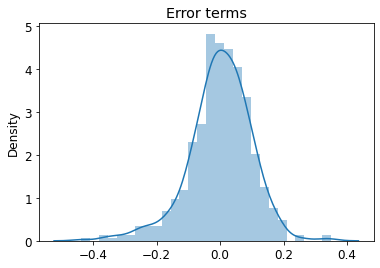

In [66]:
# distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

Insights:

The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

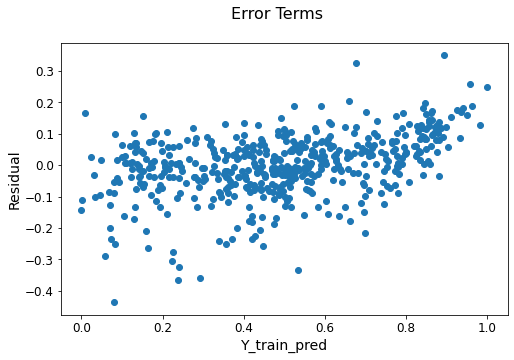

In [67]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)  

Insights:

* It seems like the corresponding residual plot is reasonably random.
* Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

 ### Prediction on test set

In [68]:
# check dataframe for the test set
bike_test.head()

yr  holiday  workingday      temp       hum  windspeed  season_summer  \
566   1        0           0  0.652175  0.863516   0.393568              0   
374   1        0           1  0.276477  0.584521   0.340487              0   
181   0        0           1  0.817910  0.265533   0.165370              0   
529   1        0           1  0.720868  0.486457   0.476922              1   
233   0        0           1  0.777567  0.359532   0.524373              0   

     season_fall  season_winter  weekday_Mon  ...  mnth_may  mnth_jun  \
566            1              0            0  ...         0         0   
374            0              0            0  ...         0         0   
181            1              0            0  ...         0         0   
529            0              0            0  ...         0         1   
233            1              0            1  ...         0         0   

     mnth_jul  mnth_aug  mnth_sep  mnth_oct  mnth_nov  mnth_dec  \
566         1         0         0         0         0         0   
374         0         0         0         0         0         0   
181         1         0         0         0         0         0   
529         0         0         0         0         0         0   
233         0         1         0         0         0         0   

     weathersit_Mist_Cloudy  weathersit_LightSnow_LightRain  
566                       0                               1  
374                       0                               0  
181                       0                               0  
529                       0                               0  
233                       0                               0  

[5 rows x 28 columns]

In [69]:
# select final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

yr  holiday      temp  windspeed  season_summer  season_winter  mnth_sep  \
566   1        0  0.652175   0.393568              0              0         0   
374   1        0  0.276477   0.340487              0              0         0   
181   0        0  0.817910   0.165370              0              0         0   
529   1        0  0.720868   0.476922              1              0         0   
233   0        0  0.777567   0.524373              0              0         0   

     weathersit_Mist_Cloudy  weathersit_LightSnow_LightRain  
566                       0                               1  
374                       0                               0  
181                       0                               0  
529                       0                               0  
233                       0                               0

In [70]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

const  yr  holiday      temp  windspeed  season_summer  season_winter  \
566    1.0   1        0  0.652175   0.393568              0              0   
374    1.0   1        0  0.276477   0.340487              0              0   
181    1.0   0        0  0.817910   0.165370              0              0   
529    1.0   1        0  0.720868   0.476922              1              0   
233    1.0   0        0  0.777567   0.524373              0              0   

     mnth_sep  weathersit_Mist_Cloudy  weathersit_LightSnow_LightRain  
566         0                       0                               1  
374         0                       0                               0  
181         0                       0                               0  
529         0                       0                               0  
233         0                       0                               0

In [71]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

In [72]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.815


In [73]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.807


In [74]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0096


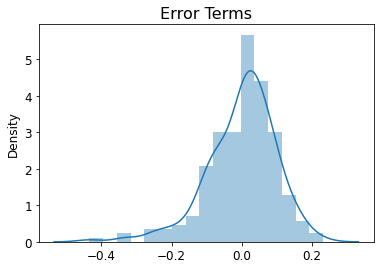

In [75]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

* The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

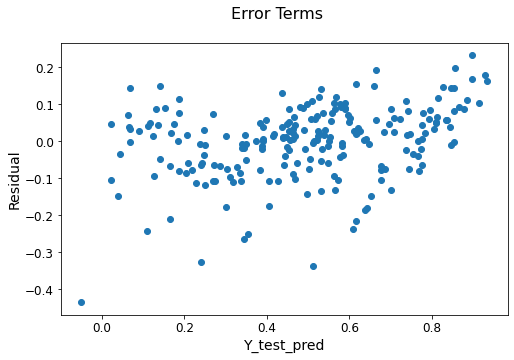

In [76]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

* It seems like the corresponding residual plot is reasonably random.

Text(0, 0.5, 'y_test_pred')

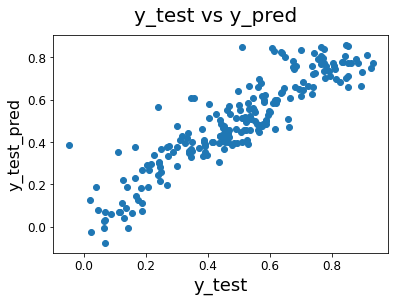

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)    

Insights:

We can colude that the model lm_5 fit isn't by chance, and has descent predictive power.

### Conclusions

In [78]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

R- Sqaured train:  0.82   Adj. R-Squared train: 0.819
R- Sqaured test :  0.81   Adj. R-Squared test : 0.807

Coefficent for the variables are:
const                             0.097
yr                                0.256
holiday                          -0.097
temp                              0.552
windspeed                        -0.135
season_summer                     0.092
season_winter                     0.143
mnth_sep                          0.093
weathersit_Mist_Cloudy           -0.085
weathersit_LightSnow_LightRain   -0.264
dtype: float64


The equation of our best fitted line is:

cnt= 0.097+(0.256×yr) + (0.097×holiday) + (0.552×temp) − (0.135×windspeed) + (0.092×SeasonSummer) + (0.143×SeasonWinter) + (0.093×MonthSep) − (0.085×WeathersitMistCloudy) − (0.264×weathersitLightSnowLightRain)

* From R-Squared and adj R-Squared value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.
* Coefficients of the variables explains the factors effecting the bike demand

* Based on final model top three features contributing significantly towards explaining the demand are:

   1.Temperature (0.552)
   
   2.weathersit : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.264)
   
   3.year (0.256)
   
   
##### So it recommended to give these variables utmost importance while planning to achieve maximum demand.